1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [37]:
x=np.random.normal(0,0.1,size=(100,100))
x


array([[-0.01262175, -0.13430269, -0.0046746 , ..., -0.10055977,
        -0.09652351, -0.13578231],
       [-0.1084536 ,  0.0898106 ,  0.01164258, ..., -0.05651934,
         0.00775863,  0.00802292],
       [ 0.0163056 , -0.01345078, -0.04753704, ..., -0.0994408 ,
         0.11444047, -0.18745686],
       ...,
       [-0.04076266, -0.07697301,  0.1810567 , ..., -0.11537788,
         0.17661593,  0.16471751],
       [ 0.08159784,  0.08999823, -0.04244746, ...,  0.16365735,
        -0.00515483,  0.15540898],
       [-0.14729373, -0.09301634,  0.19309159, ...,  0.01572574,
        -0.10165902, -0.06790014]])

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
import seaborn as sns
import pandas as pd

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

/home/saretta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


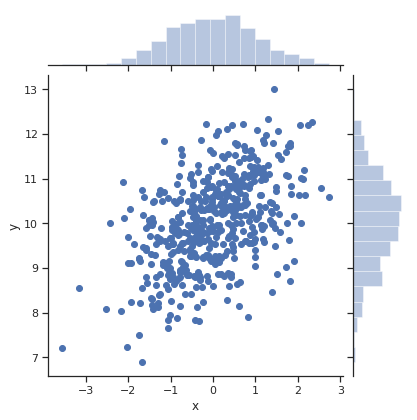

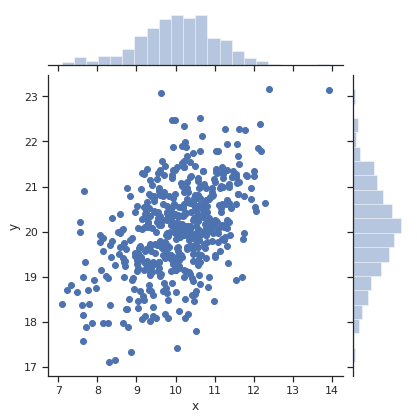

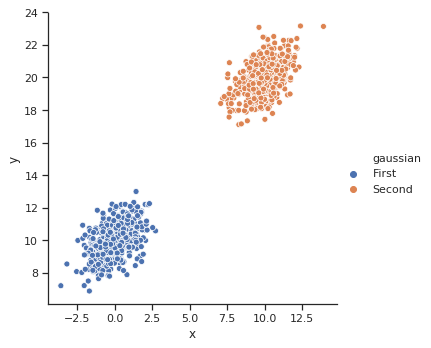

In [25]:
mean, cov = [0, 10], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 500)

df = pd.DataFrame(data, columns=["x", "y"])
df["gaussian"]="First"
sns.jointplot(x="x", y="y", data=df);
mean2, cov2 = [10, 20], [(1, .5), (.5, 1)]
data2 = np.random.multivariate_normal(mean2, cov2, 500)

df2 = pd.DataFrame(data2, columns=["x", "y"])
df2["gaussian"]="Second"
sns.jointplot(x="x", y="y", data=df2);
df3=pd.concat([df,df2],ignore_index=True)
df3
sns.relplot(x="x", y="y", hue="gaussian", data=df3);


/home/saretta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


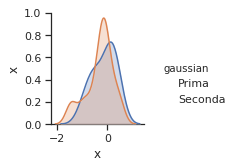

In [16]:
mu, sigma = 0, .5
mu2, sigma2 = 0, .5
df1=pd.DataFrame({'x':np.random.normal(mu,sigma, size=10), 'gaussian': "Prima"})
df2=pd.DataFrame({'x':np.random.normal(mu2,sigma2, size=10), 'gaussian': "Seconda"})
z=pd.concat([df1,df2],ignore_index=True)
a=z.loc[:9,'x']
b=z.loc[10:,'x']
sns.set(style="ticks")
sns.pairplot(z,hue="gaussian", markers='x')


Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/saretta/.wget-hsts'. HSTS will be disabled.
--2018-11-28 15:59:06--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-11-28 15:59:07--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08174f553becebbce1aad08444.dl.dropboxusercontent.com/cd/0/inline/AWffZ5HIUiBggOqmzODU6m1c5VINGUG5DvRA7fNM5sLUk055nWAVYYY215v0BWTjGwLHY7GjY84FRy8KAHSysw5AEvd0D6j4hGfW6TGfkyOCsGjdJlq8w3J5Zihr6YPqwe2

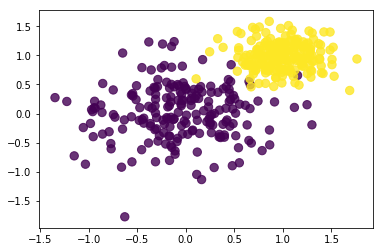

In [1]:
 ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [34]:
file=np.load('residuals_261.npy')
print(file.ndim)

file.tolist()

#df

0


{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
         0.16666667,  0.08333333]),
 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}

In [22]:
file.item()

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
         0.16666667,  0.08333333]),
 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}